In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils.np_utils import to_categorical


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [18]:
#data, info = tfds.load('mnist', with_info=True, data_dir='./data')
data, info = tfds.load('mnist', with_info=True, download=False, data_dir='./data')


In [19]:
train_data = tfds.as_numpy(data['train'])
test_data = tfds.as_numpy(data['test'])

In [20]:
X_train = []
y_train = []

for digit in train_data:
    X_train.append(digit['image'])
    y_train.append(digit['label'])       

X_train = np.array(X_train)
y_train = np.array(y_train)

In [21]:
X_train.shape

(60000, 28, 28, 1)

In [5]:
# one-hot coding
y_train = to_categorical(y_train)

In [6]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [7]:
len(y_train)

51000

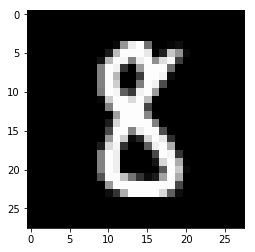

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
i = 10
plt.gray()
plt.imshow(X_train[i].reshape(28,28), interpolation='none')
plt.show()

print(y_train[i])


## Convolutional Neural Network

In [9]:
# See https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

In [10]:
##create model
model = Sequential()

#add model layers
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(60, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0506 16:07:26.359833 140340767377152 deprecation.py:506] From /home/david/cats-vs-dogs/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 40)        7240      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 60)          9660      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 60)          0         
__________

In [13]:
output = model.fit(X_train, y_train, epochs=20,  validation_data=(X_validate, y_validate))

Instructions for updating:
Use tf.cast instead.


W0506 16:07:26.850719 140340767377152 deprecation.py:323] From /home/david/cats-vs-dogs/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 51000 samples, validate on 9000 samples
Epoch 1/20
 8384/51000 [===>..........................] - ETA: 43s - loss: 13.1902 - acc: 0.1740

KeyboardInterrupt: 

In [ ]:
output.history

In [ ]:
metrics = pd.DataFrame(output.history)

In [ ]:
metrics.tail()

In [ ]:
sns.lineplot(data=metrics, x=metrics.index, y='val_loss')

In [ ]:
X_test= []
y_test = []

for digit in test_data:
    X_test.append(digit['image'])
    y_test.append(digit['label'])       

X_test= np.array(X_test)
y_test = np.array(y_test)


In [ ]:
# one-hot coding
y_test = to_categorical(y_test)

In [ ]:
model.evaluate(X_test, y_test)

In [16]:
X_train.shape

(51000, 28, 28, 1)